### Predicting Student marks based on Study hours

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Reading the Dataset

In [2]:
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

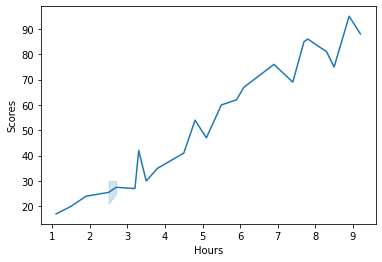

In [4]:
sns.lineplot(x="Hours", y="Scores", data=df)

In [5]:
X = np.array(df["Hours"]).reshape(-1,1)
y = np.array(df["Scores"])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [16]:
lre = LinearRegression()
lre.fit(X_train,y_train)

LinearRegression()

In [17]:
print(f"Coeff     : {lre.coef_[0]:.3f}\nIntercept : {lre.intercept_:.3f}")

Coeff     : 9.941
Intercept : 1.508


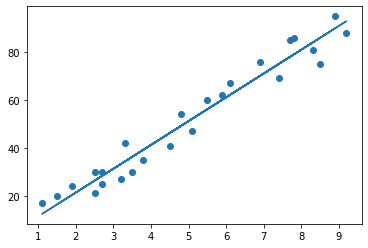

In [19]:
regline=(lre.coef_*X)+(lre.intercept_)

plt.scatter(X,y)
plt.plot(X,regline)
plt.show()

In [20]:
y_hat = lre.predict(X_test)
df = pd.DataFrame({"Actual":y_test,"Predicted":y_hat})
print(df)

   Actual  Predicted
0      17  12.442587
1      21  26.359448
2      24  20.395079
3      88  92.961570
4      76  70.098155


In [21]:
hour = [[9.25]]
p_score = lre.predict(hour)
print(f"If a student studies for 9.25 hrs, then mark will be {p_score[0]:.2f}")

If a student studies for 9.25 hrs, then mark will be 93.46


In [23]:
acc = lre.score(X_test,y_test)
print(f"The accuracy of applied model is {acc*100:.2f}%")

The accuracy of applied model is 97.36%
